Problem statement:
    
-To predict the total sales generated from all the sales channel from the given dataset.

In [1]:
#loading the dataset

import pandas as pd
import numpy as np

df=pd.read_csv("advertising.csv")

In [2]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
df=df.set_index('Unnamed: 0')

In [4]:
df.sample(5)

,TV,radio,newspaper,sales
Unnamed: 0,,,,
159,11.7,36.9,45.2,7.3
109,13.1,0.4,25.6,5.3
140,184.9,43.9,1.7,20.7
84,68.4,44.5,35.6,13.6
65,131.1,42.8,28.9,18.0


In [5]:
#checking for null values

df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:ylabel='Unnamed: 0'>

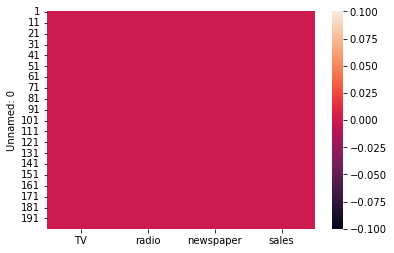

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

-so the dataset has no null values and float datatype in all columns.


-now we are going to do exploratory data analysis by data visualization.

# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


<AxesSubplot:xlabel='TV', ylabel='sales'>

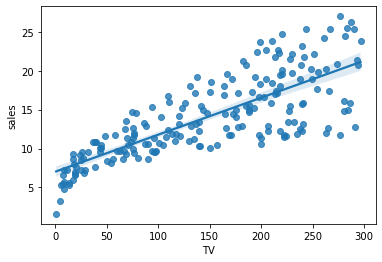

In [10]:
#the target variable is sales columns.

sns.regplot('TV','sales',data=df)

-it can be seen that TV sales is directly proprtional to total sales, as TV sales is increasing total sales are also increasing.

<AxesSubplot:xlabel='radio', ylabel='sales'>

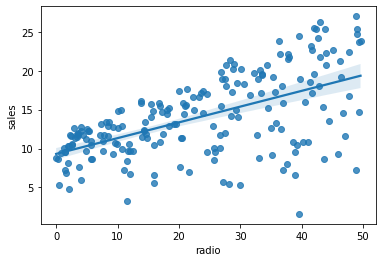

In [11]:
sns.regplot('radio','sales',data=df)

-it can be seen that even though the radio sales is increasing it is not certain that total sales too are increasing and also data distribution is random for some extent.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

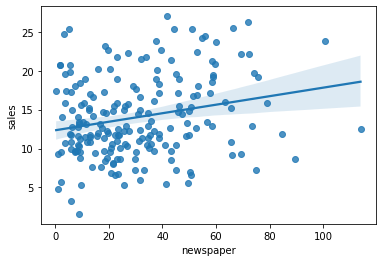

In [12]:
sns.regplot('newspaper','sales',data=df)

-newspaper too has not very good correlation with overall sales.

In [13]:
#checking for correlation

df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [14]:
df.corr()['sales'].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

<AxesSubplot:>

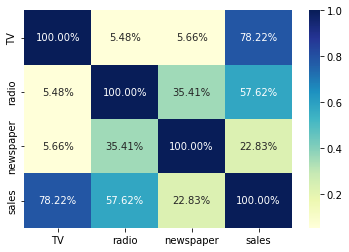

In [15]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',fmt='.2%')

conclusion:
- as it could be seen from scatterplots, correlation attribute is showing the same results.
- 'TV' has the strongest correlation bond with the target variable while 'newspaper' has the weakest bond.
- 'radio' has a good correlation bond with the target variable.

In [16]:
# now let's, describe our dataset:

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


it can be seen that:
- mean for 'TV' is less than it's median which means that the data is negatively skewed.
- mean for both other columns is greater than their median resulting in positively skewed data.
- much differnece present between 75 percentile and maximum values so outliers might be present.

<AxesSubplot:xlabel='TV'>

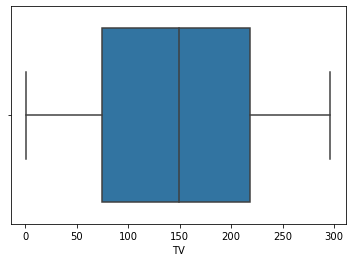

In [17]:
#let's check for outliers

sns.boxplot(df['TV'],orient="h")

<AxesSubplot:xlabel='radio'>

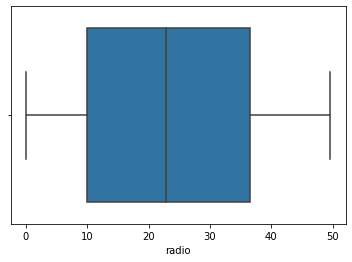

In [18]:
sns.boxplot(df['radio'])

<AxesSubplot:xlabel='newspaper'>

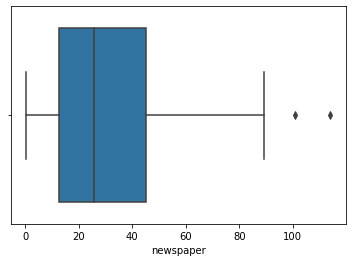

In [19]:
sns.boxplot(df['newspaper'])

so, for 'TV' and 'radio' no outliers present and for 'newspaper' some outliers are present.

# Data cleaning:
- we will deal with outliers, skewness and other factors in this part.

In [20]:
#let's try zscore method for outliers removal

from scipy.stats import zscore

z=np.abs(zscore(df))

In [21]:
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [22]:
#so only two outliers are present, so we will remove them or keep them, it won't affect our model majorily

df_new=df[(z<3).all(axis=1)]

In [23]:
df.shape

(200, 4)

In [24]:
df_new.shape

(198, 4)

In [25]:
print('Data loss is:',(200-198)/200*100,'%')

Data loss is: 1.0 %


In [26]:
# now selecting our feature and target variable for further process

x=df_new.drop('sales',axis=1)
y=df_new['sales']

In [27]:
x.shape

(198, 3)

In [28]:
y.shape

(198,)

In [29]:
#checking for skewness

x.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
dtype: float64

-setting the threshold for skewness as +/- .65, so every column falls under this only.

<AxesSubplot:xlabel='TV', ylabel='Density'>

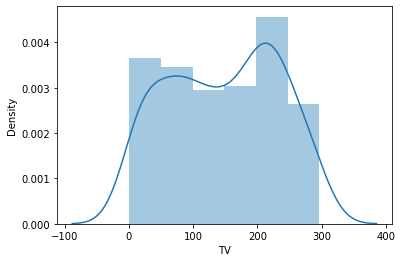

In [30]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

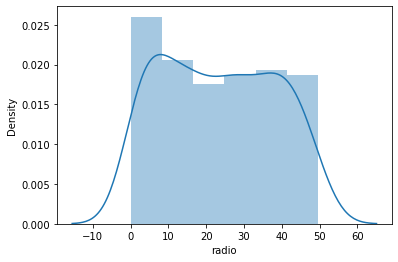

In [31]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

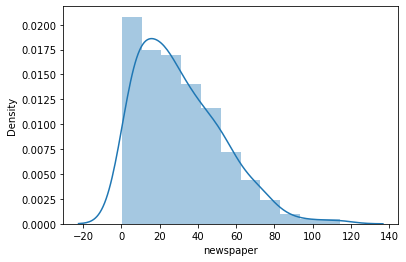

In [32]:
sns.distplot(df['newspaper'])

-so, the building blocks are not much higher than normal distribution curve for all three feature columns.

In [33]:
#checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['features']=x.columns
    print(vif)

In [34]:
vif_calc()

   VIF Factor   features
0    2.502183         TV
1    3.275285      radio
2    3.126386  newspaper


-so it can be seen that the feature columns don't have high multicollinearity

In [35]:
#scaling the input data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

since the target variable is of continuous type data and has got many classes too we will use simple linear regression algorithm for our model

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [37]:
lr=LinearRegression()

In [38]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    if round(r2_score(predtest,y_test)*100)==round(r2_score(predtrain,y_train)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(predtrain,y_train)*100)
        print('Testing accuracy score is',r2_score(predtest,y_test)*100,'\n')

At random state 12 the model performs very well
At random state 12 :
Training accuracy score is 88.0374624280104
Testing accuracy score is 88.42521093391646 

At random state 16 the model performs very well
At random state 16 :
Training accuracy score is 87.69835988542066
Testing accuracy score is 88.00766040430702 

At random state 67 the model performs very well
At random state 67 :
Training accuracy score is 87.8430799256139
Testing accuracy score is 88.35317744456937 

At random state 79 the model performs very well
At random state 79 :
Training accuracy score is 87.8690749576197
Testing accuracy score is 87.98018307855968 



In [39]:
#let's take 12 as the random state

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
lr.fit(x_train,y_train)
predtrain=lr.predict(x_train)
predtest=lr.predict(x_test)

In [40]:
#checking for cross validation score

for j in range(2,10):
    lss=cross_val_score(lr,x,y,cv=j)
    lsc=lss.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',lsc*100)
    print('Accuracy score is:',r2_score(predtest,y_test)*100,'\n')

At cv= 2
Cross Validation Score is: 88.86177292201751
Accuracy score is: 88.42521093391646 

At cv= 3
Cross Validation Score is: 88.90406332045909
Accuracy score is: 88.42521093391646 

At cv= 4
Cross Validation Score is: 88.80501918930908
Accuracy score is: 88.42521093391646 

At cv= 5
Cross Validation Score is: 88.53605756683912
Accuracy score is: 88.42521093391646 

At cv= 6
Cross Validation Score is: 88.68174285063071
Accuracy score is: 88.42521093391646 

At cv= 7
Cross Validation Score is: 88.3828289486476
Accuracy score is: 88.42521093391646 

At cv= 8
Cross Validation Score is: 88.80334554150218
Accuracy score is: 88.42521093391646 

At cv= 9
Cross Validation Score is: 88.10485430282272
Accuracy score is: 88.42521093391646 



In [41]:
#checking error for LinearRegression

mselr=mean_squared_error(predtest,y_test)
maelr=mean_absolute_error(predtest,y_test)
print(mselr)
print(maelr)

2.6533893382706477
1.2659015260980557


In [42]:
#trying hyperparameter tuning and ensemble techniques for best model:

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [44]:
#Regularization:

In [45]:
from sklearn.linear_model import Lasso,Ridge

ls=Lasso()

para={'alpha':[.0001,.001,.01,.1,1,10],'random_state':[i for i in range(11)]}
clf=GridSearchCV(ls,para)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [47]:
ls=Lasso(alpha=.1,random_state=0)
ls.fit(x_train,y_train)
predls=ls.predict(x_test)
print(r2_score(predls,y_test)*100)

87.6801853218436


In [48]:
msels=mean_squared_error(predls,y_test)
maels=mean_absolute_error(predls,y_test)
print(msels)
print(maels)

2.6758753079016038
1.276336627384746


In [49]:
lrr=Ridge()

para={'alpha':[.0001,.001,.01,.1,1,10],'random_state':[i for i in range(11)]}
clf=GridSearchCV(lrr,para)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [50]:
lrr=Ridge(alpha=1,random_state=0)
lrr.fit(x_train,y_train)
predlrr=lrr.predict(x_test)
print(r2_score(predlrr,y_test)*100)

88.23689428140686


In [51]:
mselrr=mean_squared_error(predlrr,y_test)
maelrr=mean_absolute_error(predlrr,y_test)
print(mselrr,maelrr)

2.66292482624686 1.268674191808778


In [52]:
#ensemble:

In [53]:
parameters={'criterion':["squared_error", "absolute_error", "poisson"],'max_features':['sqrt','log2','auto']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'squared_error', 'max_features': 'auto'}


In [54]:
rf=RandomForestRegressor(criterion='squared_error',max_features='auto')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=.20)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

rfscore=r2_score(predrf,y_test)

print('Accuracy score for Random Forest is:',rfscore*100)

Accuracy score for Random Forest is: 98.18970395809842


In [55]:
#finding best random_state:

In [57]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.20)
    rf=RandomForestRegressor(criterion='absolute_error',max_features='auto')
    rf.fit(x_train,y_train)
    predrf=rf.predict(x_test)
    if round(r2_score(predrf,y_test)*100,1)>97.8:
        print('At random state i:',i)
        print('Accuracy score:',r2_score(predrf,y_test)*100,'\n')

At random state i: 0
Accuracy score: 98.12591695286588 

At random state i: 1
Accuracy score: 98.10643102108484 

At random state i: 5
Accuracy score: 98.11623812916716 

At random state i: 7
Accuracy score: 98.54125192951759 

At random state i: 9
Accuracy score: 98.23300741122381 

At random state i: 11
Accuracy score: 98.5398875195754 

At random state i: 12
Accuracy score: 98.37148705399363 

At random state i: 14
Accuracy score: 98.3880538525561 

At random state i: 16
Accuracy score: 97.97343771508396 

At random state i: 17
Accuracy score: 98.25265138138865 

At random state i: 19
Accuracy score: 98.15993659385398 

At random state i: 20
Accuracy score: 98.27541590787723 

At random state i: 21
Accuracy score: 98.2773508658887 

At random state i: 22
Accuracy score: 98.24656686257 

At random state i: 23
Accuracy score: 98.20044730042947 

At random state i: 24
Accuracy score: 97.94979262194627 

At random state i: 32
Accuracy score: 97.95498356692995 

At random state i: 33
Acc

In [56]:
#now checking for cross validation score for random forest

for j in range(2,20):
    rf=RandomForestRegressor(criterion='squared_error',max_features='auto')
    rfcvs=cross_val_score(rf,x,y,cv=j)
    rfc=rfcvs.mean()
    print('At cv=',j)
    print('Cross Validation Score is:',rfc*100,'\n')

At cv= 2
Cross Validation Score is: 96.84933004203967 

At cv= 3
Cross Validation Score is: 97.37851612025536 

At cv= 4
Cross Validation Score is: 97.76737191198998 

At cv= 5
Cross Validation Score is: 97.53317956753492 

At cv= 6
Cross Validation Score is: 97.55959728099283 

At cv= 7
Cross Validation Score is: 97.6505298859428 

At cv= 8
Cross Validation Score is: 97.84606737943903 

At cv= 9
Cross Validation Score is: 97.70166477119821 

At cv= 10
Cross Validation Score is: 97.87941439339862 

At cv= 11
Cross Validation Score is: 97.5743966079336 

At cv= 12
Cross Validation Score is: 97.50533697843014 

At cv= 13
Cross Validation Score is: 97.75062632438798 

At cv= 14
Cross Validation Score is: 97.73978736359808 

At cv= 15
Cross Validation Score is: 97.71238943913997 

At cv= 16
Cross Validation Score is: 97.63253097381082 

At cv= 17
Cross Validation Score is: 97.75613481957004 

At cv= 18
Cross Validation Score is: 97.78650149622634 

At cv= 19
Cross Validation Score is: 97.8

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32,test_size=.20)
rf=RandomForestRegressor(criterion='absolute_error',max_features='auto')
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(predrf,y_test)*100)

97.68374726833996


In [74]:
#cross validation at cv=7 for random forest

rf=RandomForestRegressor(criterion='squared_error',max_features='auto')
rfcvs=cross_val_score(rf,x,y,cv=6)
rfc=rfcvs.mean()
print(rfc*100)

97.66591973239827


In [75]:
mserf=mean_squared_error(predrf,y_test)
maerf=mean_absolute_error(predrf,y_test)
print(mserf)
print(maerf)

0.6267688624999977
0.6652249999999993


In [79]:
preddf=pd.DataFrame({'Original Sales':y_test,'Predicted Sales':predrf})
preddf

,Original Sales,Predicted Sales
Unnamed: 0,,
133,5.7,5.1530
130,9.7,10.0300
75,17.0,17.3680
175,11.5,11.8350
48,23.2,22.8365
31,21.4,20.3490
146,10.3,10.5610
183,8.7,8.6840
28,15.9,15.3820


In [80]:
errordf=pd.DataFrame({'Mean Squared Error':[mselr,msels,mselrr,mserf],'Mean Absolute Error':[maelr,maels,maelrr,maerf]})
errordf

,Mean Squared Error,Mean Absolute Error
0,2.653389,1.265902
1,2.675875,1.276337
2,2.662925,1.268674
3,0.626769,0.665225


-least error with RandomForestRegressor

In [82]:
print('Model is performing extremely well')
print('Accuracy score at random state',32,'is:',round(r2_score(predrf,y_test)*100,1))
print('Cross validation score at cv',6,'is:',round(rfc*100,1))

Model is performing extremely well
Accuracy score at random state 32 is: 97.7
Cross validation score at cv 6 is: 97.7


In [83]:
#saving the best model

import pickle

filename='advertising.pkl'
pickle.dump(rf,open(filename,'wb'))